#### Минипроект 1
1. Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)
2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.
3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?
4. Визуализируйте продажи по дням.
5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [20]:
import os
from pathlib import *
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
folder_data = [i for i in os.listdir('/home/jupyter-m.kirjanova-8/shared/homeworks/python_ds_miniprojects/4/data') if not i.startswith('.')]

In [25]:
folder_data

['2020-12-05',
 '2020-12-08',
 '2020-12-09',
 '2020-12-04',
 '2020-12-06',
 '2020-12-03',
 '2020-12-07']

In [9]:
for path, dirs, files in os.walk('/home/jupyter-m.kirjanova-8/shared/homeworks/python_ds_miniprojects/4/data/'):
    print(path, dirs, files)

/home/jupyter-m.kirjanova-8/shared/homeworks/python_ds_miniprojects/4/data/ ['2020-12-05', '2020-12-08', '2020-12-09', '2020-12-04', '2020-12-06', '2020-12-03', '2020-12-07'] []
/home/jupyter-m.kirjanova-8/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05 ['Petr_Ivanov', 'Petr_Smirnov', 'Rostislav_Smirnov', 'Kirill_Smirnov', 'Alexey_Fedorov', 'Alexey_Petrov'] []
/home/jupyter-m.kirjanova-8/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov [] ['data.csv']
/home/jupyter-m.kirjanova-8/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov [] ['data.csv']
/home/jupyter-m.kirjanova-8/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov [] ['data.csv']
/home/jupyter-m.kirjanova-8/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smirnov [] ['data.csv']
/home/jupyter-m.kirjanova-8/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Fedorov [] ['data.csv']
/home/jupyter-m.kirjanova-8/shared/homeworks

In [12]:
os.path.expanduser(path)

'/home/jupyter-m.kirjanova-8/shared/homeworks/python_ds_miniprojects/4/data/2020-12-07/Vasiliy_Ivanov'

In [19]:
os.listdir(path)[0]

'data.csv'

In [26]:
path0 = '/home/jupyter-m.kirjanova-8/shared/homeworks/python_ds_miniprojects/4/data'

In [37]:
folder

[('/home/jupyter-m.kirjanova-8/shared/homeworks/python_ds_miniprojects/4/data',
  ['2020-12-05',
   '2020-12-08',
   '2020-12-09',
   '2020-12-04',
   '2020-12-06',
   '2020-12-03',
   '2020-12-07'],
  []),
 ('/home/jupyter-m.kirjanova-8/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05',
  ['Petr_Ivanov',
   'Petr_Smirnov',
   'Rostislav_Smirnov',
   'Kirill_Smirnov',
   'Alexey_Fedorov',
   'Alexey_Petrov'],
  []),
 ('/home/jupyter-m.kirjanova-8/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov',
  [],
  ['data.csv']),
 ('/home/jupyter-m.kirjanova-8/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov',
  [],
  ['data.csv']),
 ('/home/jupyter-m.kirjanova-8/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov',
  [],
  ['data.csv']),
 ('/home/jupyter-m.kirjanova-8/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smirnov',
  [],
  ['data.csv']),
 ('/home/jupyter-m.kirjanova-8/shared/homeworks/python_ds

In [74]:
newDF = pd.DataFrame()
for address, dirs, files in folder:
    for file in files:
        print((address+'/'+file).split('/')[-2]

Petr_Ivanov
Petr_Smirnov
Rostislav_Smirnov
Kirill_Smirnov
Alexey_Fedorov
Alexey_Petrov
Petr_Petrov
Rostislav_Petrov
Kirill_Smirnov
Alexey_Fedorov
Anton_Smirnov
Alexey_Smirnov
Anton_Petrov
Rostislav_Petrov
Anton_Smirnov
Anton_Ivanov
Petr_Fedorov
Vasiliy_Ivanov
Kirill_Fedorov
Alexey_Smirnov
Rostislav_Ivanov
Petr_Ivanov
Rostislav_Fedorov
Petr_Smirnov
Rostislav_Smirnov
Petr_Fedorov
Vasiliy_Ivanov
Vasiliy_Fedorov
Alexey_Smirnov
Anton_Petrov
Vasiliy_Petrov
Kirill_Petrov
Petr_Fedorov
Vasiliy_Ivanov
Kirill_Fedorov
Alexey_Smirnov
Rostislav_Fedorov
Alexey_Ivanov
Petr_Smirnov
Alexey_Fedorov
Anton_Smirnov
Anton_Ivanov
Petr_Fedorov
Vasiliy_Ivanov


In [107]:
newDF = pd.DataFrame()
for address, dirs, files in os.walk(path0):
    for file in files:
        
        tempDF = pd.read_csv(address+'/'+file)
        path_parts = address.split('/')
        name = path_parts[-1]
        date = path_parts[-2]
        tempDF['name'] = name
        tempDF['date'] = date
      
        
        newDF = newDF.append(tempDF)
        
      

In [108]:
newDF

,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...,...
0,0,18,4,Petr_Fedorov,2020-12-07
1,1,94,4,Petr_Fedorov,2020-12-07
0,0,95,2,Vasiliy_Ivanov,2020-12-07
1,1,83,3,Vasiliy_Ivanov,2020-12-07


In [109]:
newDF.drop(columns=['Unnamed: 0'], inplace=True)

In [110]:
newDF

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
0,18,4,Petr_Fedorov,2020-12-07
1,94,4,Petr_Fedorov,2020-12-07
0,95,2,Vasiliy_Ivanov,2020-12-07
1,83,3,Vasiliy_Ivanov,2020-12-07


In [111]:
newDF.reset_index(drop=True, inplace=True)

In [181]:
newDF.head()

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05


In [182]:
newDF.dtypes

product_id     int64
quantity       int64
name          object
date          object
dtype: object

In [114]:
newDF.quantity.sum()

480

In [ ]:
Alexey_Smirnov, Petr_Smirnov

In [121]:
newDF.groupby('name') \
     .agg({'quantity': 'sum'}) \
     .sort_values(by=['quantity'], ascending=False)

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28
Rostislav_Petrov,28
Vasiliy_Ivanov,27
Alexey_Fedorov,24
Anton_Ivanov,23


In [139]:
DF_prod_top10 = newDF.groupby('product_id', as_index=False) \
     .agg({'quantity': 'sum'}) \
     .sort_values(by=['quantity'], ascending=False) \
     .head(10) \
     .reset_index(drop=True)

In [140]:
DF_prod_top10

,product_id,quantity
0,27,20
1,56,18
2,24,15
3,74,15
4,41,14
5,34,13
6,94,13
7,66,13
8,92,12
9,50,12


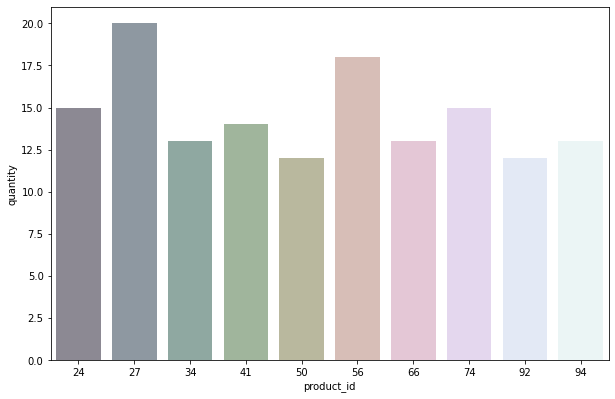

In [180]:
plt.figure(figsize=(10,6.5))
sns.barplot(x='product_id', y='quantity', data=DF_prod_top10, palette="cubehelix", alpha=0.5);
# viridis  jet inferno cubehelix

In [184]:
newDF['date'] = \
newDF['date'].apply(pd.to_datetime, yearfirst=True) 

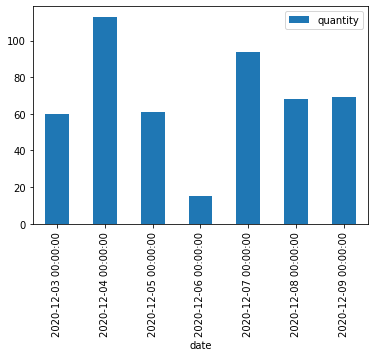

In [186]:
newDF.groupby('date') \
     .agg({'quantity': 'sum'}) \
     .plot(kind='bar')
  

In [192]:
newDF = newDF.drop_duplicates(subset=['product_id', 'name', 'date'])

In [193]:
newDF

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
156,18,4,Petr_Fedorov,2020-12-07
157,94,4,Petr_Fedorov,2020-12-07
158,95,2,Vasiliy_Ivanov,2020-12-07
159,83,3,Vasiliy_Ivanov,2020-12-07


In [199]:
newDF.groupby(['name', 'product_id']) \
     .agg({'date': 'count'}) \
     .query("date > 1")

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2


#### Минипроект 2

В файле содержится информация о покупках людей


id | Товар | Количество
--- | --- | ---
1 | Арбуз | 1.0
1 | Чай | 1.0
1 | Сгущёнка | 0.5
2 | Арбуз | 1.0
2 | Чай | 1.0

id – означает покупку (в одну покупку входят все товары, купленные пользователем во время 1 похода в магазин)
Товар – наименование товара
Количество – число единиц купленного товара
Воспользуйтесь этими данными и выясните, какие пары товаров пользователи чаще всего покупают вместе. По сути, вам необходимо найти паттерны покупок, что позволит оптимизировать размещение продуктов в магазине, для удобства пользователей и увеличения выручки.

1_Товар | 2_Товар | Встречаемость
--- | --- | ---
Чай | Арбуз | 2
Арбуз | Сгущёнка | 1
Чай | Сгущёнка | 1


1_Товар – наименование первого товара
2_Товар – наименование второго товара
Встречаемость – число раз, когда такая пара была встречена
Другими словами: 2 раза люди покупали одновременно чай и арбуз, 1 раз одновременно покупали арбуз и сгущёнку и 1 раз одновременно были куплены чай со сгущёнкой.

Напишите код на python для получения нужной таблицы и укажите 5 наиболее распространённых паттернов.

In [31]:
import pandas as pd
from itertools import combinations

In [32]:
# Выгружаем данные и формируаем датафрейм
prod_sale = pd.read_csv('https://stepik.org/media/attachments/lesson/409319/test1_completed.csv')

In [33]:
# Посмотрим первые 5 строк
prod_sale.head()

,id,Товар,Количество
0,17119,Лимон,1.1
1,17119,Лимон оранжевый,0.7
2,17119,Лук-порей,10.0
3,17119,Лук репчатый,2.5
4,17119,Малина свежая,1.0


In [34]:
# Переименуем столбцы
prod_sale = prod_sale.rename(columns = {'Товар':'Product', 'Количество':'Count'})
prod_sale.head()

,id,Product,Count
0,17119,Лимон,1.1
1,17119,Лимон оранжевый,0.7
2,17119,Лук-порей,10.0
3,17119,Лук репчатый,2.5
4,17119,Малина свежая,1.0


In [35]:
# Сгруппируем данные по id заказа и сгенерируем всевозможные коминации пар, сбросим индексы, переименуем столбцы

df_pares = prod_sale.groupby('id') \
                    .apply(lambda x: pd.DataFrame(list(combinations(x.Product, 2)))) \
                    .reset_index() \
                    .rename(columns = {0: 'product_1', 1: 'product_2'})

In [36]:
df_pares.head()

,id,level_1,product_1,product_2
0,17119,0,Лимон,Лимон оранжевый
1,17119,1,Лимон,Лук-порей
2,17119,2,Лимон,Лук репчатый
3,17119,3,Лимон,Малина свежая
4,17119,4,Лимон,Морковь немытая


In [37]:
# Сгруппируем данные по двум продуктам, посчитаем кол-во повторений, сбросим индексы, переименуем столбцы, отсортируем по убыванию

df_pares_final = df_pares.groupby(['product_1','product_2']) \
        .size() \
        .reset_index() \
        .rename(columns = {0: 'pare_count'}) \
        .sort_values(by=['pare_count'], ascending=False)

In [38]:
# Выведем 5 наиболее популярных паттернов
df_pares_final_5 = df_pares_final.head()
df_pares_final_5

,product_1,product_2,pare_count
22447,Огурцы Луховицкие,Укроп,403
25209,Петрушка,Укроп,390
1693,Арбуз,Огурцы Луховицкие,314
10961,Кабачки,Огурцы Луховицкие,300
13381,Кинза,Укроп,290


In [39]:
# Сбросим индексы, уберем лишние столбцы, переименуем столбцы

df_pares_final_5 = df_pares_final_5 \
                .reset_index() \
                .drop(['index'], axis = 1) \
                .rename(columns = {'product_1': '1_Товар', 'product_2': '2_Товар', 'pare_count': 'Встречаемость'})

In [40]:
# Следующие 5 пар товаров пользователи чаще всего покупают вместе
df_pares_final_5

,1_Товар,2_Товар,Встречаемость
0,Огурцы Луховицкие,Укроп,403
1,Петрушка,Укроп,390
2,Арбуз,Огурцы Луховицкие,314
3,Кабачки,Огурцы Луховицкие,300
4,Кинза,Укроп,290


#### Минипроект 3

Описание эксперимента  
Перед вами таблица, где числовая переменная – непрерывная. Задача – сравнить группы двумя способами: бутстрапом и u-тестом

Описание колонок
 * value – значения метрики
 * experimentVariant – Вариант теста (Control – контроль, Treatment – тест)

Задача
1. Сравните результат между тестом и контролем по двум кейсам:
 * Примените бутстрап (с np.mean) и критерий mann-whitney, а потом сравните p-value
 * Примените бутстрап (с np.median) и критерий mann-whitney, а потом сравните p-value
2. Напишите выводы, которые можно сделать на основе анализа примененных критериев


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

plt.style.use('ggplot')

from scipy.stats import mannwhitneyu

import seaborn as sns

In [2]:
df_exper = pd.read_csv('https://stepik.org/media/attachments/lesson/396008/hw_bootstrap.csv', sep=';')

In [3]:
df_exper.head()

,Unnamed: 0,value,experimentVariant
0,1,"10,3804953740268",Control
1,2,"9,54686666784264",Control
2,3,"11,0882146509904",Control
3,4,"10,1472740570122",Control
4,5,"9,78980767524929",Control


In [4]:
df_exper.shape

(1000, 3)

In [5]:
df_exper.experimentVariant.unique()

array(['Control', 'Treatment'], dtype=object)

In [6]:
df_exper['value'] = df_exper['value'].str.replace(',', '.').astype(float)

In [7]:
df_exper.dtypes

Unnamed: 0             int64
value                float64
experimentVariant     object
dtype: object

In [8]:
df_exper_test = df_exper.query("experimentVariant == 'Treatment'")
df_exper_control = df_exper.query("experimentVariant == 'Control'")

In [9]:
df_exper_control.shape

(500, 3)

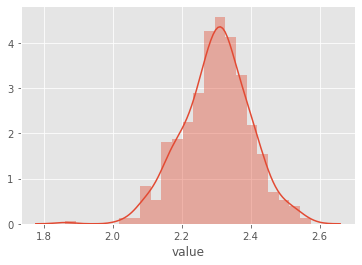

In [10]:
sns.distplot(np.log(df_exper_control.value))

In [11]:
df_exper_test.shape

(500, 3)

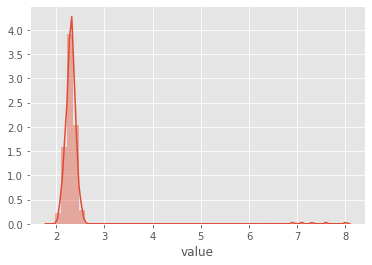

In [12]:
sns.distplot(np.log(df_exper_test.value))

In [13]:
# С помощью U-критерия Манна-Уитни исследуем значимо ли различаются распределения или нет

In [14]:
mannwhitneyu(df_exper_test.value, df_exper_control.value)

MannwhitneyuResult(statistic=124189.5, pvalue=0.42960742912427896)

In [15]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа

In [16]:
def get_bootstrap_mean(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
    
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

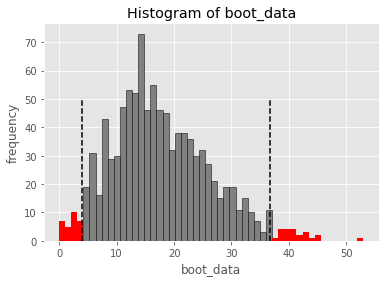

In [17]:
booted_data_mean = get_bootstrap_mean(df_exper_test.value, df_exper_control.value) 
# в результате хранится разница двух распределений, ДИ и pvalue

In [18]:
booted_data_mean["p_value"] # альфа

0.03881802548771476

In [19]:
booted_data_mean["quants"] # ДИ

,0
0.025,4.000691
0.975,36.758952


In [20]:
def get_bootstrap_median(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.median, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
    
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

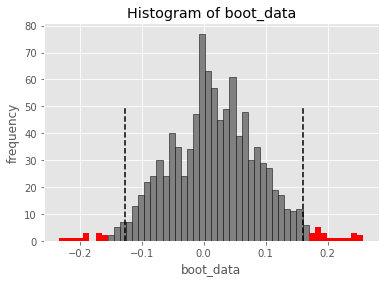

In [21]:
booted_data_median = get_bootstrap_median(df_exper_test.value, df_exper_control.value) 
# в результате хранится разница двух распределений, ДИ и pvalue

In [22]:
booted_data_median["p_value"] # альфа

0.8255837283753734

In [23]:
booted_data_median["quants"] # ДИ

,0
0.025,-0.127427
0.975,0.159659


### Выводы

В нашем случае в каждой выборке по 500 значений. Чем больше выборка, тем больше вероятность одинаковых значений. Чем больше в двух выборках одинаковых значений, тем хуже работают ранговые методы. На графиках мы видим, что у нас есть большое количество пересечений в выборках. Значение p-value 0.43, что говорит нам о том, что нулевую гипотезу об отсуствии различий у наших распределений мы не отвергаем.
Бутстрап при исследовании медиан наших выборок выдал нам p-value = 0.83, мы можем сделать вывод, что наши различия по медианам не статзначимы.

При этом Бутстрап в случае с оценкой в распределениях среднего дает нам статзначимые различия (p-value = 0.039). 
Таким образом Бутстрап нам дает более конкретную оценку наших распределений.

Манн-Уитни и Бутстрап проверяют разные гипотезы. С помощью бутстрапа мы проверяем нулевую гипотезу о равенстве средних, а Манн-Уитни о равенстве распределений. Что значит равенство распределений? Это значит, что случайно выбранное значение из одной выборки может быть равновероятно больше или меньше случайного значения из другой выборки (проверяется не только медиана).

Манн-Уитни как и любой статистический оценщик не очень приветлив к дисбалансу. Это сказывается в первую очередь на мощности критерия – чем сильнее дисбаланс, тем реже критерий будет обнаруживать реальную разницу (эффект). 

* Тестовая выборка имеет большие выбросы, что сильно искажает нам среднее значение
* Применяя бутстрап с оценкой среднего, мы могли бы отклонить нулевую гипотезу о равенстве средних и сделать вывод, что тестовая и контрольная выборка имеют различия
* Однако, тот же бутстрап, но уже по медиане не дает нам отклонить нулевую гипотезу, так как p-value сильно больше 0.05, т.к. здесь проверяется другая гипотеза
* U-критерий Манна-Уитни так же не дал бы нам отклонить нулевую гипотезу. Оценки pvalue так же направлены как у бутстрапирования медианы



#### Минипроект 4

А/А-тестирование мобильного приложения. Необходимо посчитать результаты A/A-теста, проверяя метрику качества FPR (будем проверять на конверсии в покупку). Известно, что сплит-система сломана. Требуется проверить утверждение о поломке и найти ее причины, если сплит-система действительно сломана

Описание колонок
 * experimentVariant – вариант эксперимента
 * version – версия приложения
 * purchase – факт покупки

1. Запустите A/A-тест
2. Посчитайте FPR на уровне альфа = 0.05 (ставьте подвыборки без возвращения объемом 1000). Вы увидите, что FPR > альфа! Нам нужно наоборот – чтобы было меньше.
3. Найдите причины поломки сплит-системы, ориентируясь на результаты эксперимента (подсказка: найдите аномалию в версии приложения)
4. Напишите выводы, которые можно сделать на основе анализа результатов A/A-теста

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [1]:
path = 'https://stepik.org/media/attachments/lesson/396012/hw_aa.csv'

In [7]:
df = pd.read_csv(path, sep=';')

In [8]:
df.head()

,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0


In [13]:
df.shape

(127018, 5)

In [10]:
df.version.unique()

array(['v2.8.0', 'v2.9.0', 'v3.7.4.0', 'v3.8.0.0'], dtype=object)

In [11]:
df.experimentVariant.unique()

array([1, 0])

#### Проведем A/A-тест для нашего мобильного приложения

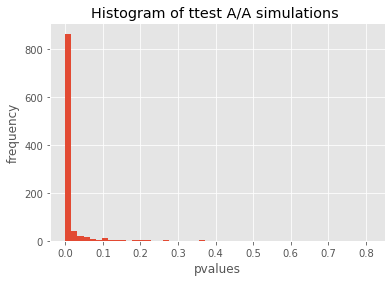

0.923

In [15]:
n = 100000
simulations = 1000
n_s = 1000
res = []


# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df[df.experimentVariant == 1]['purchase'].sample(n_s, replace = False).values
    s2 = df[df.experimentVariant == 0]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

Мы видим, что распределение p-value не походит на равномерное, сильно скошено влево и показатель FPR сильно превышает уровень альфа, таким образом А/А тест не сходится и система сплитования работает некорректно.

#### Исследуем конверсии покупок с разбиением на экспериментальные группы 0 и 1

In [19]:
df.groupby('experimentVariant', as_index=False) \
    .agg({'purchase': 'mean'})

,experimentVariant,purchase
0,0,0.023945
1,1,0.053242


Посмотрев на конверсии покупок с разбиением на группы, мы видим, что они отличаются, визуально кажется, что сильной разницы нет, но следует продолжить эксперимент и найти в каких подкатегориях есть существенные различия.

#### Посмотрим подробнее на конверсии с разбиением по версии приложения

In [30]:
df_conv = df.groupby(['experimentVariant', 'version'], as_index=False) \
    .agg({'purchase': 'mean', 'Unnamed: 0': 'count'})

In [31]:
df_conv

,experimentVariant,version,purchase,Unnamed: 0
0,0,v2.8.0,0.000993,41283
1,0,v2.9.0,0.074658,11921
2,0,v3.7.4.0,0.059943,4204
3,0,v3.8.0.0,0.057604,5694
4,1,v2.8.0,0.045606,41552
5,1,v2.9.0,0.071304,12033
6,1,v3.7.4.0,0.063018,4221
7,1,v3.8.0.0,0.062848,6110


Мы видим, что разбиение на группы работает приблизительно одинаково, а значит система сплитования работает хорошо. 
Но при этом в группах для версии v2.8.0 конверсии покупок сильно разнятся и в случае с группой (experimentVariant = 0) конверсия практически равна 0. И это очень существенные различия, с учетом того, что выборки достаточно большие (41283 и 41552)

#### Посчитаем значения p-value для каждой версии мобильного приложения, чтобы убедиться в наших наблюдениях более точно

In [45]:
stats.ttest_ind(df[(df.experimentVariant == 1) & (df.version == 'v2.9.0')]['purchase'], \
                df[(df.experimentVariant == 0) & (df.version == 'v2.9.0')]['purchase'])


Ttest_indResult(statistic=-0.9979597634962479, pvalue=0.31830895167207446)

In [46]:
stats.ttest_ind(df[(df.experimentVariant == 1) & (df.version == 'v2.8.0')]['purchase'], \
                df[(df.experimentVariant == 0) & (df.version == 'v2.8.0')]['purchase'])


Ttest_indResult(statistic=42.963540840360324, pvalue=0.0)

In [47]:
stats.ttest_ind(df[(df.experimentVariant == 1) & (df.version == 'v3.7.4.0')]['purchase'], \
                df[(df.experimentVariant == 0) & (df.version == 'v3.7.4.0')]['purchase'])


Ttest_indResult(statistic=0.5874925850487471, pvalue=0.5568886771079735)

In [48]:
stats.ttest_ind(df[(df.experimentVariant == 1) & (df.version == 'v3.8.0.0')]['purchase'], \
                df[(df.experimentVariant == 0) & (df.version == 'v3.8.0.0')]['purchase'])


Ttest_indResult(statistic=1.1956188950206779, pvalue=0.23186933664059722)

Как видим, именно для версии v2.8.0 наши группы отличаются статзначимо (p-value < 0.05), поэтому нам следует проверить нашу систему сплитования исключив эту версию из выборок

#### Уберем из выборки версию приложения v2.8.0 и снова запустим А/А тест

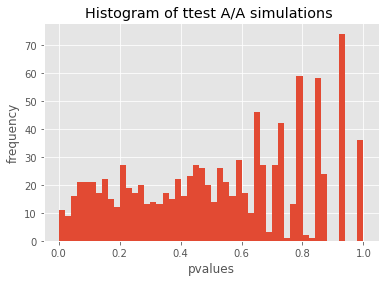

0.028

In [24]:
simulations = 1000
n_s = 1000
res = []


# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df[(df.experimentVariant == 1) & (df.version != 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    s2 = df[(df.experimentVariant == 0) & (df.version != 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

По результатам теста мы видим, что FPR не превышает уровень альфа, таким образом мы статистически доказали, что различия в конверсиях где версия приложения была v2.8.0 и были причиной поломки сплит-системы

#### Выводы

Проделав наш эксперимент, мы убедились в важности А/А тестов и необходимости их проведения еще до А/Б тестов, дабы исключить вероятность получаемых изменений в результате неправильной(некачественной) системы сплитования. Для того, чтобы обнаружить, что же сломало А/А тест, нужно обратить внимание на различные срезы наших данных и их комбинации, посмотреть глубже в данные и изучить их. Потом повторить тест уже с выбросом тех параметров, которые давали различия и посмотреть на новые результаты и сделать выводы. 

В нашем случае, разделение на группы по версии приложения v2.8.0 произошло некорректно, есть дисбаланс по количеству покупок в группах 1 и 0. Исключив эту версию мы получили уже равномерное распределние p-value и корректное значение метрики качества FPR. У этих данных корректная сплит-система.

#### Минипроект 5
В базе данных вашей компании присутствуют следующие таблицы

- city
    - city_id – id города, где проходит акция
    - client_city_id – id города, где находится покупатель
    - city – город
    - client_city – город, где находится покупатель
- client
    - client_id – id покупателя
    - client_city_id – id города, где находится покупатель
    - birth_date – дата рождения покупателя
    - registration – дата регистрации покупателя
- promotion
    - promotion_id – id акции
    - category_id – id категории
    - promotion_name – акция
    - category_name – категория
    - partner_id – id партнёра
    - partner_name – партнёр
- purchase
    - purchase_id – id покупки
    - partner_id – id партнёра
    - client_id – id покупателя
    - city_id – id города
    - promotion_id – id акции
    - category_id – id категории
    - purchase_date – дата покупки
    - price – цена за единицу товара
    - quantity – число проданных единиц
    - status – статус покупки

Вам нужно написать запрос, чтобы получить такую таблицу

- purchase_date – дата покупки
- purchase_id – id покупки
- client_id – id покупателя
- client_age – возраст покупателя
- client_registration_age – как долго человек пользуется вашими магазинами
- client_category – содержит new или old, если это первая или последующая покупка соответственно
- promotion_name – акция
- category_name – категория
- partner_name – партнёр
- client_city – город, где находится покупатель
- city – город
- revenue – сумма выручки
- quantity – число проданных единиц

При этом в таблице должны присутствовать только значения, где в поле status стоит значение 1, и только те, где purchase_date находится в диапазоне от 01.05.2020 до 01.08.2020

База данных доступна по имени project_variant_2

In [1]:
import pandahouse as ph
import pandas as pd

In [2]:
#объявляем параметры подключения
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [4]:
#пишем запрос, и получаем данные из clickhouse в pandas dataframe

query = """

SELECT 
    purchase_date,
    purchase_id,
    pur.client_id AS client_id,
    toInt8(dateDiff('day', birth_date, now(), 'Europe/Moscow') / 365) AS client_age,
    dateDiff('day', registration , toDate(now('Europe/Moscow'))) AS client_registration_age, 
    if(pur.purchase_id = pur_min_id.min_purchase_id, 'new', 'old') AS client_category,
    pro.promotion_name AS promotion_name,
    pro.category_name AS category_name,
    pro.partner_name AS partner_name,
    pc.client_city AS client_city,
    pc.city AS city,
    (toInt32(pur.quantity) * toInt32(pur.price)) AS revenue,
    toInt32(pur.quantity) AS quantity
    
    FROM project_variant_2.purchase AS pur
    
    JOIN
        (
        SELECT
            MIN(pur.purchase_id) AS min_purchase_id,
            pur.client_id AS client_id
        FROM project_variant_2.purchase AS pur
        JOIN
            (
            SELECT 
                MIN(purchase_date) AS min_date,
                client_id
            FROM project_variant_2.purchase
            GROUP BY client_id
            ) AS min_date_pur
                ON pur.client_id = min_date_pur.client_id
        WHERE pur.purchase_date = min_date_pur.min_date
        GROUP BY pur.client_id
        ) AS pur_min_id
            ON pur.client_id = pur_min_id.client_id    
    
    
    JOIN project_variant_2.client AS pcl ON pur.client_id = pcl.client_id
  
    JOIN project_variant_2.promotion AS pro 
                ON pro.promotion_id = pur.promotion_id
    JOIN project_variant_2.city AS pc 
                ON pc.client_city_id = pcl. client_city_id
                
WHERE   (purchase_date >= '2020.05.01' AND purchase_date <= '2020.08.01')
    AND 
        pur.status = 1
ORDER BY 
        purchase_date





"""
df = ph.read_clickhouse(query, connection=connection_default)
df

,purchase_date,purchase_id,client_id,client_age,client_registration_age,client_category,promotion_name,category_name,partner_name,client_city,city,revenue,quantity
0,2020-05-01,470,918,23,571,old,campaign_2,Фрукты,"ООО Ширяева, Хохлова и Тимофеева",Щучинщина,Москва,660,4
1,2020-05-01,470,918,23,571,old,campaign_2,Фрукты,"ООО Ширяева, Хохлова и Тимофеева",Щучинщина,Санкт-Петербург,660,4
2,2020-05-01,470,918,23,571,old,campaign_2,Фрукты,"ООО Ширяева, Хохлова и Тимофеева",Щучинщина,Новгород,660,4
3,2020-05-01,470,918,23,571,old,campaign_2,Фрукты,"ООО Ширяева, Хохлова и Тимофеева",Щучинщина,Минск,660,4
4,2020-05-01,470,918,23,571,old,campaign_2,Фрукты,"ООО Ширяева, Хохлова и Тимофеева",Щучинщина,Ярославль,660,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23446,2020-08-01,8247,279,21,639,old,campaign_4,Прочее,KarpovCourses,Казань,Минск,735,7
23447,2020-08-01,8247,279,21,639,old,campaign_4,Прочее,KarpovCourses,Казань,Ярославль,735,7
23448,2020-08-01,8247,279,21,639,old,campaign_4,Прочее,KarpovCourses,Казань,Казань,735,7
23449,2020-08-01,8247,279,21,639,old,campaign_4,Прочее,KarpovCourses,Казань,Киев,735,7
